In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc1 = np.loadtxt('./random_ipc_index/ipc_1.txt', dtype=int)
ipc1

array([40102, 46587, 14739, 44914, 47092, 40314, 39692, 49205, 17922,
       24848])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))
                                              

In [4]:
batch_size = 1 
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc1))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

10

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc1'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 10/10 [00:00<00:00, 43.17it/s, loss=3.17]


epoch: 1 done, loss: 0.0005427523283287883
Acc: 0.1004
[0.001]


Epoch 2: 100%|██████████| 10/10 [00:00<00:00, 279.89it/s, loss=2.91]

epoch: 2 done, loss: 0.00039387159631587565


Acc: 0.1247
[0.001]


Epoch 3: 100%|██████████| 10/10 [00:00<00:00, 262.41it/s, loss=1.49]

epoch: 3 done, loss: 0.00023911226890049875


Acc: 0.099
[0.001]


Epoch 4: 100%|██████████| 10/10 [00:00<00:00, 318.68it/s, loss=0.603]

epoch: 4 done, loss: 0.0001867172832135111


Acc: 0.1025
[0.001]


Epoch 5: 100%|██████████| 10/10 [00:00<00:00, 225.42it/s, loss=0.92]

epoch: 5 done, loss: 0.00011887821165146306


Acc: 0.11
[0.001]


Epoch 6: 100%|██████████| 10/10 [00:00<00:00, 235.47it/s, loss=0.372]

epoch: 6 done, loss: 9.875390969682485e-05


Acc: 0.1106
[0.0001]


Epoch 7: 100%|██████████| 10/10 [00:00<00:00, 219.45it/s, loss=0.291]

epoch: 7 done, loss: 5.388788122218102e-05


Acc: 0.1111
[0.0001]


Epoch 8: 100%|██████████| 10/10 [00:00<00:00, 281.42it/s, loss=0.277]

epoch: 8 done, loss: 5.030492684454657e-05


Acc: 0.1128
[0.0001]


Epoch 9: 100%|██████████| 10/10 [00:00<00:00, 266.15it/s, loss=0.271]

epoch: 9 done, loss: 7.078167254803702e-05


Acc: 0.113
[0.0001]


Epoch 10: 100%|██████████| 10/10 [00:00<00:00, 243.30it/s, loss=0.632]

epoch: 10 done, loss: 7.97429820522666e-05


Acc: 0.1128
[1e-05]


Epoch 11: 100%|██████████| 10/10 [00:00<00:00, 232.20it/s, loss=0.393]

epoch: 11 done, loss: 7.3103146860376e-05


Acc: 0.1131
[1e-05]


Epoch 12: 100%|██████████| 10/10 [00:00<00:00, 263.35it/s, loss=0.285]

epoch: 12 done, loss: 5.4677446314599365e-05


Acc: 0.1133
[1e-05]


Epoch 13: 100%|██████████| 10/10 [00:00<00:00, 238.06it/s, loss=0.388]

epoch: 13 done, loss: 7.96653184806928e-05


Acc: 0.1134
[1e-05]


Epoch 14: 100%|██████████| 10/10 [00:00<00:00, 224.26it/s, loss=0.259]

epoch: 14 done, loss: 6.274230690905824e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 15: 100%|██████████| 10/10 [00:00<00:00, 237.15it/s, loss=0.133]

epoch: 15 done, loss: 6.183308141771704e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 16: 100%|██████████| 10/10 [00:00<00:00, 233.98it/s, loss=0.16]

epoch: 16 done, loss: 7.56867157178931e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 17: 100%|██████████| 10/10 [00:00<00:00, 214.15it/s, loss=1.18]

epoch: 17 done, loss: 6.938732985872775e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 18: 100%|██████████| 10/10 [00:00<00:00, 140.01it/s, loss=0.16]

epoch: 18 done, loss: 4.8336591135011986e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 19: 100%|██████████| 10/10 [00:00<00:00, 207.99it/s, loss=0.189]

epoch: 19 done, loss: 5.941458584857173e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 10/10 [00:00<00:00, 217.02it/s, loss=1.17]


epoch: 20 done, loss: 6.88511281623505e-05
Acc: 0.1134
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 10/10 [00:00<00:00, 223.47it/s, loss=0.244]

epoch: 21 done, loss: 5.56321901967749e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 10/10 [00:00<00:00, 210.18it/s, loss=0.244]

epoch: 22 done, loss: 8.043671550694853e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 10/10 [00:00<00:00, 202.30it/s, loss=0.382]

epoch: 23 done, loss: 7.728143827989697e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 10/10 [00:00<00:00, 220.11it/s, loss=0.27]

epoch: 24 done, loss: 5.015942588215694e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 10/10 [00:00<00:00, 190.14it/s, loss=0.188]

epoch: 25 done, loss: 7.194674981292337e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 10/10 [00:00<00:00, 234.75it/s, loss=0.283]

epoch: 26 done, loss: 5.337408583727665e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 10/10 [00:00<00:00, 202.10it/s, loss=0.267]

epoch: 27 done, loss: 5.9408415836514905e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 10/10 [00:00<00:00, 180.49it/s, loss=0.176]

epoch: 28 done, loss: 5.426598363555968e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 10/10 [00:00<00:00, 163.36it/s, loss=0.133]

epoch: 29 done, loss: 7.597265357617289e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 10/10 [00:00<00:00, 157.21it/s, loss=0.169]

epoch: 30 done, loss: 5.257276279735379e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 10/10 [00:00<00:00, 149.04it/s, loss=0.26]

epoch: 31 done, loss: 6.848940392956138e-05


Acc: 0.1134
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 10/10 [00:00<00:00, 156.08it/s, loss=0.278]

epoch: 32 done, loss: 7.722083682892844e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 10/10 [00:00<00:00, 164.97it/s, loss=0.26]

epoch: 33 done, loss: 8.09478951850906e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 10/10 [00:00<00:00, 180.92it/s, loss=0.427]

epoch: 34 done, loss: 8.103677828330547e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 10/10 [00:00<00:00, 204.60it/s, loss=0.169]

epoch: 35 done, loss: 6.146964005893096e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 10/10 [00:00<00:00, 127.83it/s, loss=0.286]

epoch: 36 done, loss: 7.41355906939134e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 10/10 [00:00<00:00, 173.12it/s, loss=0.601]

epoch: 37 done, loss: 5.4481028200825676e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 10/10 [00:00<00:00, 172.52it/s, loss=0.255]

epoch: 38 done, loss: 7.885853119660169e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 10/10 [00:00<00:00, 167.56it/s, loss=0.285]

epoch: 39 done, loss: 5.116341344546527e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 10/10 [00:00<00:00, 162.96it/s, loss=0.379]

epoch: 40 done, loss: 7.04867925378494e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 10/10 [00:00<00:00, 163.70it/s, loss=0.276]

epoch: 41 done, loss: 6.12411749898456e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 10/10 [00:00<00:00, 184.85it/s, loss=0.378]

epoch: 42 done, loss: 5.453783887787722e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 10/10 [00:00<00:00, 186.68it/s, loss=0.426]

epoch: 43 done, loss: 6.641846266575158e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 10/10 [00:00<00:00, 212.91it/s, loss=0.187]

epoch: 44 done, loss: 5.732868521590717e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 10/10 [00:00<00:00, 226.91it/s, loss=0.6]

epoch: 45 done, loss: 7.880471821408719e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 10/10 [00:00<00:00, 202.35it/s, loss=0.27]

epoch: 46 done, loss: 4.983995677321218e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 10/10 [00:00<00:00, 252.87it/s, loss=0.256]

epoch: 47 done, loss: 6.680843944195658e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 10/10 [00:00<00:00, 248.84it/s, loss=0.377]

epoch: 48 done, loss: 6.157701136544347e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 10/10 [00:00<00:00, 236.11it/s, loss=0.425]

epoch: 49 done, loss: 6.098756057326682e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 10/10 [00:00<00:00, 193.15it/s, loss=0.256]

epoch: 50 done, loss: 6.916229904163629e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 10/10 [00:00<00:00, 189.06it/s, loss=0.256]

epoch: 51 done, loss: 5.8312314649811015e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 10/10 [00:00<00:00, 223.47it/s, loss=0.252]

epoch: 52 done, loss: 6.94997506798245e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 10/10 [00:00<00:00, 267.32it/s, loss=0.158]

epoch: 53 done, loss: 5.294665606925264e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 10/10 [00:00<00:00, 197.87it/s, loss=0.255]

epoch: 54 done, loss: 5.932841668254696e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 10/10 [00:00<00:00, 228.80it/s, loss=1.14]

epoch: 55 done, loss: 6.892534293001518e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 10/10 [00:00<00:00, 247.29it/s, loss=0.273]

epoch: 56 done, loss: 6.759098323527724e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 10/10 [00:00<00:00, 218.21it/s, loss=0.131]


epoch: 57 done, loss: 7.132566679501906e-05
Acc: 0.1136
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 10/10 [00:00<00:00, 241.37it/s, loss=0.167]

epoch: 58 done, loss: 6.767977902200073e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 10/10 [00:00<00:00, 221.76it/s, loss=0.278]

epoch: 59 done, loss: 5.576858893618919e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 10/10 [00:00<00:00, 235.55it/s, loss=0.365]

epoch: 60 done, loss: 5.7836845371639356e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 10/10 [00:00<00:00, 228.74it/s, loss=0.269]

epoch: 61 done, loss: 5.959884583717212e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 10/10 [00:00<00:00, 222.32it/s, loss=0.265]

epoch: 62 done, loss: 5.147822230355814e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 10/10 [00:00<00:00, 232.09it/s, loss=0.591]

epoch: 63 done, loss: 5.46785922779236e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 10/10 [00:00<00:00, 250.24it/s, loss=0.186]

epoch: 64 done, loss: 5.739575863117352e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 10/10 [00:00<00:00, 266.48it/s, loss=0.185]

epoch: 65 done, loss: 6.091840623412281e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 10/10 [00:00<00:00, 238.64it/s, loss=0.276]

epoch: 66 done, loss: 5.426443021860905e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 10/10 [00:00<00:00, 214.74it/s, loss=0.249]

epoch: 67 done, loss: 4.94866726512555e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 10/10 [00:00<00:00, 195.15it/s, loss=0.423]

epoch: 68 done, loss: 7.530227594543248e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 10/10 [00:00<00:00, 259.86it/s, loss=0.167]

epoch: 69 done, loss: 6.38998972135596e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 10/10 [00:00<00:00, 262.96it/s, loss=0.276]

epoch: 70 done, loss: 5.922353739151731e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 10/10 [00:00<00:00, 256.04it/s, loss=0.276]

epoch: 71 done, loss: 4.8732039431342855e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 10/10 [00:00<00:00, 262.76it/s, loss=0.253]

epoch: 72 done, loss: 4.5007556764176115e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 10/10 [00:00<00:00, 259.21it/s, loss=0.275]

epoch: 73 done, loss: 5.657018118654378e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 10/10 [00:00<00:00, 223.74it/s, loss=0.587]

epoch: 74 done, loss: 5.694776336895302e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 10/10 [00:00<00:00, 248.90it/s, loss=0.275]

epoch: 75 done, loss: 5.210864401306026e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 10/10 [00:00<00:00, 261.97it/s, loss=0.274]

epoch: 76 done, loss: 5.191801392356865e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 10/10 [00:00<00:00, 178.78it/s, loss=0.27]

epoch: 77 done, loss: 6.59707875456661e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 10/10 [00:00<00:00, 203.80it/s, loss=0.129]

epoch: 78 done, loss: 5.801368388347328e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 10/10 [00:00<00:00, 258.93it/s, loss=0.269]

epoch: 79 done, loss: 4.696476389653981e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 10/10 [00:00<00:00, 257.99it/s, loss=0.166]

epoch: 80 done, loss: 4.87162105855532e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 10/10 [00:00<00:00, 216.40it/s, loss=0.184]

epoch: 81 done, loss: 5.0515325710875914e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 10/10 [00:00<00:00, 159.76it/s, loss=0.157]

epoch: 82 done, loss: 5.718439933843911e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 10/10 [00:00<00:00, 236.91it/s, loss=0.273]

epoch: 83 done, loss: 4.845744842896238e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 10/10 [00:00<00:00, 223.32it/s, loss=1.12]

epoch: 84 done, loss: 6.342870619846508e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 10/10 [00:00<00:00, 252.91it/s, loss=0.239]

epoch: 85 done, loss: 7.65521326684393e-05


Acc: 0.1135
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 10/10 [00:00<00:00, 218.20it/s, loss=0.272]

epoch: 86 done, loss: 5.295032315189019e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 10/10 [00:00<00:00, 237.77it/s, loss=1.12]

epoch: 87 done, loss: 7.066509715514258e-05


Acc: 0.1136
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 10/10 [00:00<00:00, 272.91it/s, loss=0.266]

epoch: 88 done, loss: 6.567883974639699e-05


Acc: 0.1137
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 10/10 [00:00<00:00, 280.03it/s, loss=1.12]

epoch: 89 done, loss: 6.966907676542178e-05


Acc: 0.1133
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 10/10 [00:00<00:00, 274.45it/s, loss=0.267]

epoch: 90 done, loss: 6.759171810699627e-05


Acc: 0.1133
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 10/10 [00:00<00:00, 269.21it/s, loss=0.172]

epoch: 91 done, loss: 5.428201984614134e-05


Acc: 0.1133
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 10/10 [00:00<00:00, 248.81it/s, loss=0.172]

epoch: 92 done, loss: 6.555227446369827e-05


Acc: 0.1133
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 10/10 [00:00<00:00, 268.68it/s, loss=0.156]

epoch: 93 done, loss: 4.974949115421623e-05


Acc: 0.1133
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 10/10 [00:00<00:00, 240.31it/s, loss=0.262]

epoch: 94 done, loss: 5.630118539556861e-05


Acc: 0.1132
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 10/10 [00:00<00:00, 229.76it/s, loss=0.264]

epoch: 95 done, loss: 7.36679503461346e-05


Acc: 0.1132
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 10/10 [00:00<00:00, 250.41it/s, loss=0.271]

epoch: 96 done, loss: 5.962420254945755e-05


Acc: 0.1132
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 10/10 [00:00<00:00, 246.14it/s, loss=0.165]

epoch: 97 done, loss: 5.638907168759033e-05


Acc: 0.1131
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 10/10 [00:00<00:00, 258.13it/s, loss=0.238]

epoch: 98 done, loss: 6.098966332501732e-05


Acc: 0.1132
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 10/10 [00:00<00:00, 260.06it/s, loss=0.171]

epoch: 99 done, loss: 5.146400144440122e-05


Acc: 0.1132
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 10/10 [00:00<00:00, 254.31it/s, loss=0.422]

epoch: 100 done, loss: 5.1829345466103405e-05


Acc: 0.1132
[1.0000000000000002e-06]
Time taken: 1242.279369 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.1247, tensor(2.3730, device='cuda:0'))

<AxesSubplot: >

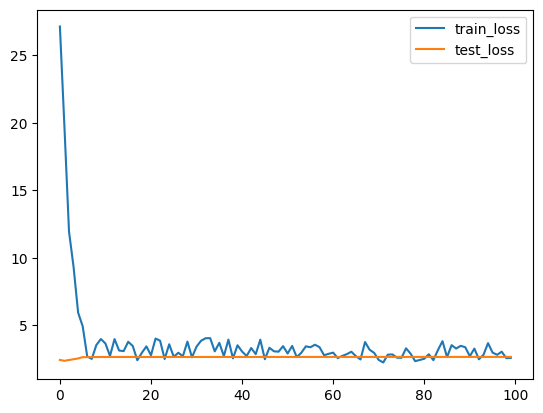

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])